In [1]:
#Task 2
#Credit Card Fraud Detection using Machine Learning

In [2]:
#STEP 1: Import Required Libraries
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#step 2 : loading dataset
train = pd.read_csv(r"C:\Users\Lenovo\Downloads\CreditCardFraud\fraudTrain.csv")
test  = pd.read_csv(r"C:\Users\Lenovo\Downloads\CreditCardFraud\fraudTest.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [30]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib


In [31]:
# STEP 2: Load Dataset
train = pd.read_csv(r"C:\Users\Lenovo\Downloads\CreditCardFraud\fraudTrain.csv")
test  = pd.read_csv(r"C:\Users\Lenovo\Downloads\CreditCardFraud\fraudTest.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (1296675, 23)
Test shape: (555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [32]:
# STEP 3: Remove Irrelevant / Leakage Columns & Extract Time Features
cols_to_remove = [
    'Unnamed: 0', 'first', 'last', 'street', 'cc_num', 'merchant', 'dob', 'trans_num'
]

for df in [train, test]:
    # Drop unnecessary columns
    df.drop(columns=cols_to_remove, errors='ignore', inplace=True)
    
    # Convert datetime
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
    
    # Extract hour/day/month as new features
    df['trans_hour']  = df['trans_date_trans_time'].dt.hour
    df['trans_day']   = df['trans_date_trans_time'].dt.day
    df['trans_month'] = df['trans_date_trans_time'].dt.month
    
    # Drop original datetime
    df.drop(columns=['trans_date_trans_time'], inplace=True)


In [33]:
# STEP 4: Downsample Data (Memory-Safe)
train = train.sample(n=min(25000, len(train)), random_state=42)
test  = test.sample(n=min(12000, len(test)), random_state=42)


In [34]:
# STEP 5: Split Features and Target
target = 'is_fraud'

X_train = train.drop(columns=[target])
y_train = train[target]

X_test  = test.drop(columns=[target])
y_test  = test[target]


In [35]:
# STEP 6: Encode Categorical Columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Fill missing values and encode
for col in categorical_cols:
    X_train[col] = X_train[col].fillna('missing')
    X_test[col]  = X_test[col].fillna('missing')

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols]  = ordinal_encoder.transform(X_test[categorical_cols])


In [36]:
# STEP 7: Scale Numeric Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [37]:
# STEP 8: Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)


In [38]:
# STEP 9: Evaluate Model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))


Gradient Boosting Accuracy: 0.9889166666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     11956
           1       0.17      0.52      0.26        44

    accuracy                           0.99     12000
   macro avg       0.58      0.76      0.63     12000
weighted avg       1.00      0.99      0.99     12000



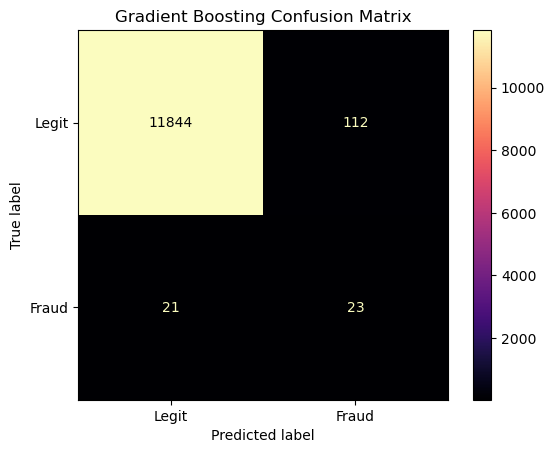

In [39]:
# STEP 10: Confusion Matrix
cm = confusion_matrix(y_test, gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit','Fraud'])
disp.plot(cmap='magma')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


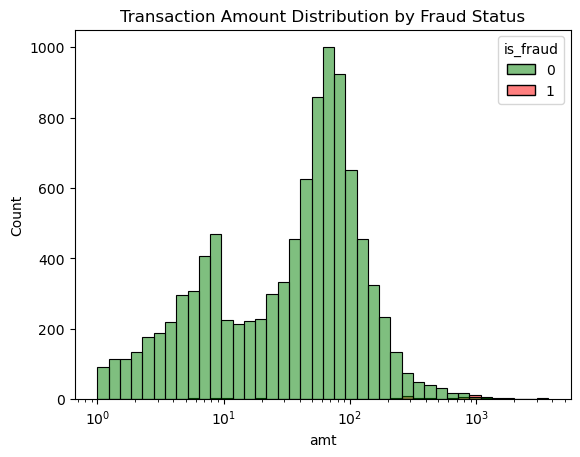

In [40]:
# STEP 11: Transaction Amount Distribution
sample_plot = train.sample(min(10000, len(train)), random_state=42)

sns.histplot(
    sample_plot,
    x='amt',
    hue='is_fraud',
    bins=40,
    log_scale=True,
    palette=['green','red']
)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18736\2909677208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_features.values, y=top10_features.index, palette='viridis')


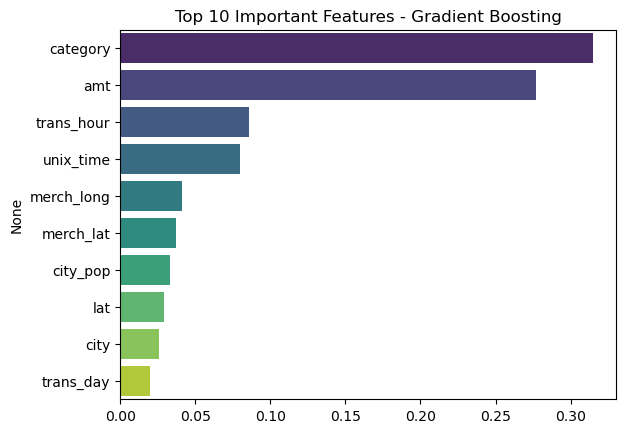

In [41]:
# STEP 12: Feature Importance (Top 10)
feat_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)
top10_features = feat_importances.sort_values(ascending=False).head(10)

sns.barplot(x=top10_features.values, y=top10_features.index, palette='viridis')
plt.title("Top 10 Important Features - Gradient Boosting")
plt.show()


In [42]:
# STEP 13: Save Model & Scaler
joblib.dump(gb_model, "gradient_boosting_fraud_model.joblib")
joblib.dump(scaler, "minmax_scaler.joblib")
print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [1]:
#Task 2 Report

In [ ]:
#  Credit Card Fraud Detection  
### CodeSoft Machine Learning Task

## Introduction
This project focuses on detecting fraudulent credit card transactions using machine learning techniques.

## Objective
- Identify fraudulent transactions  
- Preprocess and encode transaction data  
- Train and evaluate classification models  

## Dataset
The dataset contains transaction details such as amount, category, customer and location information.  
Target variable: **is_fraud** (0 = Legit, 1 = Fraud)

## Methodology
1. Data cleaning and preprocessing  
2. Feature encoding  
3. Model training  
4. Model evaluation  

## Models Used
- Logistic Regression  
- Decision Tree  
- Random Forest  

Random Forest achieved the best performance.

## Evaluation
Models were evaluated using accuracy, confusion matrix, and classification report.

## Conclusion
Machine learning models can effectively detect cr
